# Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning data and preparing data

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
pd.pandas.set_option("display.max_columns",None)
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
df=train.append(test)

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [ ]:
df.drop(columns=["User_ID"],inplace=True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
len(df.Product_ID.unique())

3677

## Handling Categorical feature

In [ ]:
categorical=[i for i in df.columns if df[i].dtype=="O"]
len(categorical)

5

### Gender

In [ ]:
df["Gender"]=df["Gender"].map({"M":0,"F":1})

### Age

In [ ]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df["Age"]=df["Age"].map({"0-17":1,"18-25":2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,"55+":7})

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data=df.copy()
encoder.fit_transform(data["Age"])

array([0, 0, 0, ..., 2, 4, 4])

Both above methods gave same results 

### City category

In [ ]:
df["City_Category"]=encoder.fit_transform(df["City_Category"])

In [ ]:
df.City_Category.value_counts()

1    329739
2    243684
0    210244
Name: City_Category, dtype: int64

### stay in city

In [ ]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].map({'0':0,'1':1,'2':2,'3':3,'4+':4})

In [ ]:
sum(np.array(encoder.fit_transform(data["Stay_In_Current_City_Years"]))-np.array(df["Stay_In_Current_City_Years"]))

0

Again both methods gave same results

## Missing values

### Convert string to integer

In [ ]:
# df['stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

### Product category 2

In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [ ]:
df["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [ ]:
df["Product_Category_2"].fillna(value=df["Product_Category_2"].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
dtype: int64

### Product category 3

In [ ]:
df["Product_Category_3"].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [ ]:
df["Product_Category_3"].fillna(value=df["Product_Category_3"].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,1,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,1,1,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,0,7,16,2,4,0,8,8.0,16.0,7969.0


In [ ]:
df.shape

(783667, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 71.7+ MB


## Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

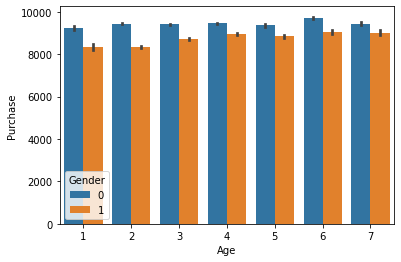

In [ ]:
sns.barplot("Age","Purchase",hue="Gender",data=df)

Purchase of men are more than woman(lmao)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

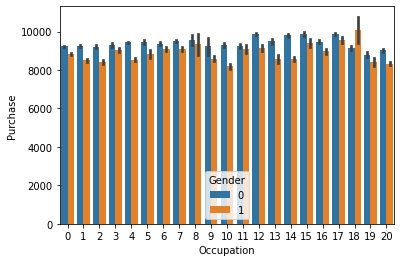

In [ ]:
sns.barplot("Occupation","Purchase",hue="Gender",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

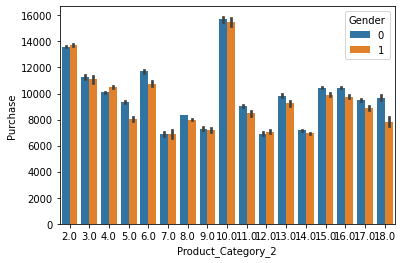

In [ ]:
sns.barplot("Product_Category_2","Purchase",hue="Gender",data=df)

## Feature scaling

In [ ]:
df.drop(columns=["Product_ID"],inplace=True)

In [ ]:
df_test=df[df["Purchase"].isnull()]
df_test.drop(columns="Purchase",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_test.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [ ]:
df_train=df[~df["Purchase"].isnull()]

In [ ]:
df_train.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
x=df_train.iloc[:,:-1]
y=df_train.Purchase

In [ ]:
x.shape

(550068, 9)

In [ ]:
y.shape

(550068,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_train.shape

(385047, 9)